# Perkenalan 

Arry Pandowo Full Stack Data Science Batch 1 dibuat untuk Live Code Challange 

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Berikut library yang digunakan

# Data Loading

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Eksplorasi Data & Preprocessing

## Melihat Korelasi Data

<AxesSubplot:>

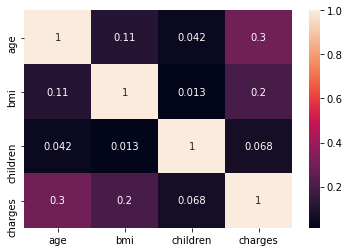

In [4]:
correlations = df.corr()
sns.heatmap(correlations, annot=True)

## Transformasi data menjadi Numerik

In [5]:
df["sex"].replace({"female":1 , "male":0}, inplace=True)
df["smoker"].replace({"yes":1 , "no":0}, inplace = True)
df["region"].replace({"southwest":0 , "southeast":1, "northwest":2, "northeast":3}, inplace = True)

## Pendefinisian Feature dan Target

In [6]:
X = df[["age", "sex","bmi", "children", "smoker", "region"]]
Y = df.charges

## Multicolinearity Test

In [7]:
print((np.abs(X.corr())>0.7).agg('sum').sum()-len(X.columns))
X.corr()

0


,age,sex,bmi,children,smoker,region
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000


Data Aman, tidak memiliki korelasi satu sama lain

## Standard Scaller

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Visualisasi sebaran data

<AxesSubplot:xlabel='smoker', ylabel='Count'>

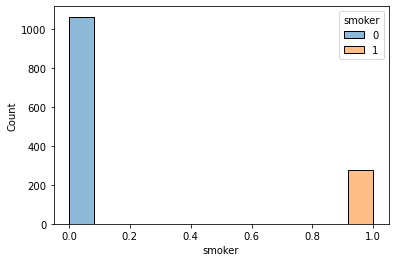

In [9]:
sns.histplot(df, x = 'smoker', hue="smoker")

## Splitting Data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

# Model

## Pendefinisian Model

In [11]:
lr = LinearRegression()

## Ilustrasi Model

13352.859567760464
[3643.66901673  179.42902618 2058.47125661  703.58440484 9513.26399328
  514.41853034]


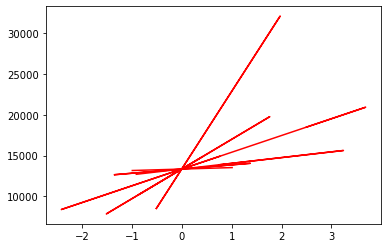

In [12]:
lr.fit(x_train, y_train)
# Print the intercept and the slope of the model
print(lr.intercept_) 
print(lr.coef_) 
# Show line of best fit
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r', label='Intercept: -39,163 \nSlope: 279.4')

In [13]:
lr

LinearRegression()

# Evaluation

## Time To Run Model

In [14]:
 %time lr.fit(x_train, y_train)

Wall time: 975 µs


LinearRegression()

1.93 ms untuk melakukan running model

## Model Inference

### Using Data Test

In [15]:
y_pred = lr.predict(x_test)

### Using New Data

In [16]:
data = ({'age': 17, 'sex' : 1, 'bmi':30.770 , 'children':1, 'smoker': 1, 'region' : 1}, {'age': 19, 'sex' : 0,"bmi":31.850 , 'children':1, 'smoker': 0, 'region' : 2})
baru = pd.DataFrame(data)
lr.predict(baru)

array([149545.08937275, 149877.30187423])

## Model Evaluation

## RMSE

In [17]:
# Import module
from sklearn.metrics import mean_squared_error
# We pass the test values and the predicted values
mse = mean_squared_error(y_test, y_pred)
# Let's take the square root
rmse = np.sqrt(mse)
# Print the result
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 5639.6032425301055


R2-Square

In [18]:
# Import r2_score module
from sklearn.metrics import r2_score
# Print R2 Score
print(r2_score(y_test, y_pred))

0.7710039376795367


# Kesimpulan

* Model yang dibuat memiliki error sebesar 5853 dari angka real yang seharusnya
* 73% variation dari data berhasil ditebak oleh Model

# Soal Kedua

# Library

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Data Loading

In [20]:
df2 = pd.read_csv('Barchi19_Morph-catalog_670k-galaxies.csv')
df2.head()

C:\Users\arryp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dr7objid,TType,K,C,A,S,G2,H,Error,ML2classes,CNN2classes1stClass,CNN2classes1stClassPerc,CNN2classes2ndClass,CNN2Classes2ndClassPerc,CNN3classes1stClass,CNN3Classes1stClassPerc,CNN3Classes2ndClass,CNN3Classes2ndClassPerc,CNN3Classes3rdClass,CNN3Classes3rdClassPerc
0,587722952230175035,3.32451915741,13.578409,0.329970,0.773113,0.845577,1.741071,0.828695,0,1,1,100.00,0,0.00,1,68.53,0,23.44,2,8.03
1,587722952230175138,2.18677520752,33.819154,0.385649,0.614753,0.827377,1.604379,0.743405,0,1,1,99.98,0,0.02,1,82.26,0,16.50,2,1.25
2,587722952230175145,1.80833292007,16.767047,0.322301,0.861787,0.934300,1.511484,0.740404,0,1,1,99.60,0,0.40,1,82.44,0,14.63,2,2.93
3,587722952230175173,2.6344764232599998,23.491833,0.338940,0.777340,0.881642,1.539079,0.740161,0,1,1,100.00,0,0.00,1,70.51,2,20.58,0,8.91
4,587722952230240617,3.08055019379,35.769025,0.330124,0.762131,0.910175,1.102738,0.654903,0,1,1,99.96,0,0.04,1,88.67,2,8.77,0,2.56


# Data Cleaning

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670560 entries, 0 to 670559
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dr7objid                 670560 non-null  int64  
 1   TType                    670560 non-null  object 
 2   K                        670560 non-null  float64
 3   C                        670560 non-null  float64
 4   A                        670560 non-null  float64
 5   S                        670560 non-null  float64
 6   G2                       670560 non-null  float64
 7   H                        670560 non-null  float64
 8   Error                    670560 non-null  int64  
 9   ML2classes               670560 non-null  object 
 10  CNN2classes1stClass      670560 non-null  int64  
 11  CNN2classes1stClassPerc  670560 non-null  float64
 12  CNN2classes2ndClass      670560 non-null  int64  
 13  CNN2Classes2ndClassPerc  670560 non-null  float64
 14  CNN3

In [22]:
df2.columns.tolist()

['dr7objid',
 'TType',
 'K',
 'C',
 'A',
 'S',
 'G2',
 'H',
 'Error',
 'ML2classes',
 'CNN2classes1stClass',
 'CNN2classes1stClassPerc',
 'CNN2classes2ndClass',
 'CNN2Classes2ndClassPerc',
 'CNN3classes1stClass',
 'CNN3Classes1stClassPerc',
 'CNN3Classes2ndClass',
 'CNN3Classes2ndClassPerc',
 'CNN3Classes3rdClass',
 'CNN3Classes3rdClassPerc']

# Data Preprocessing

In [23]:
feature_cols = df2[['C','A', 'S', 'G2', 'H']]
target = df2["CNN2classes1stClass"]
X = feature_cols
Y = target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=69)

## Model Definition

In [25]:
from sklearn.svm import SVC
model_svc_linear = SVC(kernel='rbf', random_state=69,C=1)

## Scaller 

In [26]:
def z_scoring(arrays):
    arr_mean = arrays.mean()
    arr_std = arrays.std()
    arr_rst = (arrays-arr_mean)/arr_std
    return arr_rst,arr_mean,arr_std

def restore_z_score(arrays,arr_mean,arr_std):
    return arrays*arr_std+arr_mean

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 
y_train_trf,y_mean,y_std = z_scoring(y_train)

## Model Training

In [28]:
%time model_svc_linear.fit(X_train_trf, y_train)

sampai dengan waktu LC hampir habis running model training belum selesai 

## Model Evaluation

## MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_train, model_pred)

idem belom selesai running juga

## MSE

In [ ]:
np.sqrt(mean_squared_error(y_train, model_pred))

Pending Running

## R2

In [ ]:
r2_score(y_train,model_pred)

Pending Running